# 01PAO25-25 - Python, Data Types

![Instituto Superior Tecnológico Quito](Recurso-26.png)

**Nombre:** Germán Del Río  
**Fecha:** 21/07/2055  
**PruebaN:** 03

---

![Python Logo](python_logo.png)

[-- Enlace al Repositorio](https://github.com/Saquis/MachineLearning/tree/main/Pruebas/PruebaTercercialParcial)

# Examen del Tercer Parcial 
## Regresión lineal
Dado el archivo **movie_genre_classification_final.csv** se encuentra un base de datos con información de **50000 películas** que incluyen variables como: <br>
 * Título,
 * Año de estreno,
 * Duración,
 * Puntuación promedio,
 * Número de votos,
 * Presupuesto,
 * Ingresos en taquilla,
 * Número de premios obtenidos,
 * Entre otras caracterisiticas.
Como parate del análisis de predicción, se desea estudiar la relación entre el:<br>
* Presupuesto de una película
y sus caracteristicas cuantitativas, para estimar la **recaudación en taquilla (BoxOffice_USD)**. Para ello, se plantea entrenar un modelo de regresión lineal.<br>

# Objetivo 
Predecir el valor de la variable **BoxOffice_USD** a partir de variables numéricas independientes disponibles en el dataset, tales como:<br>
* Budget_USD (Presupuesto en dólares)
* Duration (Duración en minutos)
* Ratting (Calificiación Promedio"
* Votes (Número de votos)
* Num_Awards (Número de premios obtenidos)
* Critic_reviews (Números de reseñas de criticos)

El dataset fue extraido desder <a href="https://www.kaggle.com/datasets/therohithanand/movie-genre-classification">DataSet<a> <br>

## Entrega esperada
* Código bien estructurado y comentado
* Gráficos claros en los pasos 2, 4 y 5.
* Breve análisis escrito de lso los resultados obtenidos.



In [21]:
# Instalación necessarias e impotacioneks  // Se ejecuta de esta forma por que estaba dando error en el kernel de python, ejor trabajar con directamente con el env de conda.


!conda install pandas -y
!conda install numpy -y
!conda install matplotlib -y
!conda install seaborn -y
!conda install scikit-learn -y

# Importaciones 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Modelo de regresión
from sklearn.metrics import mean_squared_error, r2_score #Metricas 





Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.



In [19]:
# Lectura de datos
# Leer todo el archivo
with open('movie_genre_classification_final.csv', 'r', encoding='utf-8') as file:
    content = file.read()

Información básica del dataset:
Forma del dataset: (50000, 17)

Primeras 5 filas:
             Title  Year  Director  Duration  Rating   Votes  \
0  Winds of Fate 4  1980    R. Lee       167     4.1  182425   
1     Firestorm 11  2014   S. Chen       166     4.1  449351   
2    Silent Echo 2  2016   A. Khan       170     4.1  363328   
3    City Lights 4  1982  L. Zhang       170     9.9   62371   
4   Broken Truth 1  1990  L. Zhang        91     5.3    4600   

                                         Description  Language Country  \
0   A touching love story with heartwarming moments.   Spanish   China   
1  A fast-paced thriller with intense action scenes.    Korean   China   
2  A fast-paced thriller with intense action scenes.    Korean   Japan   
3  An emotional journey exploring complex charact...  Japanese   Japan   
4  An imaginative world filled with magic and won...    Korean     USA   

   Budget_USD  BoxOffice_USD    Genre Production_Company Content_Rating  \
0    39979615

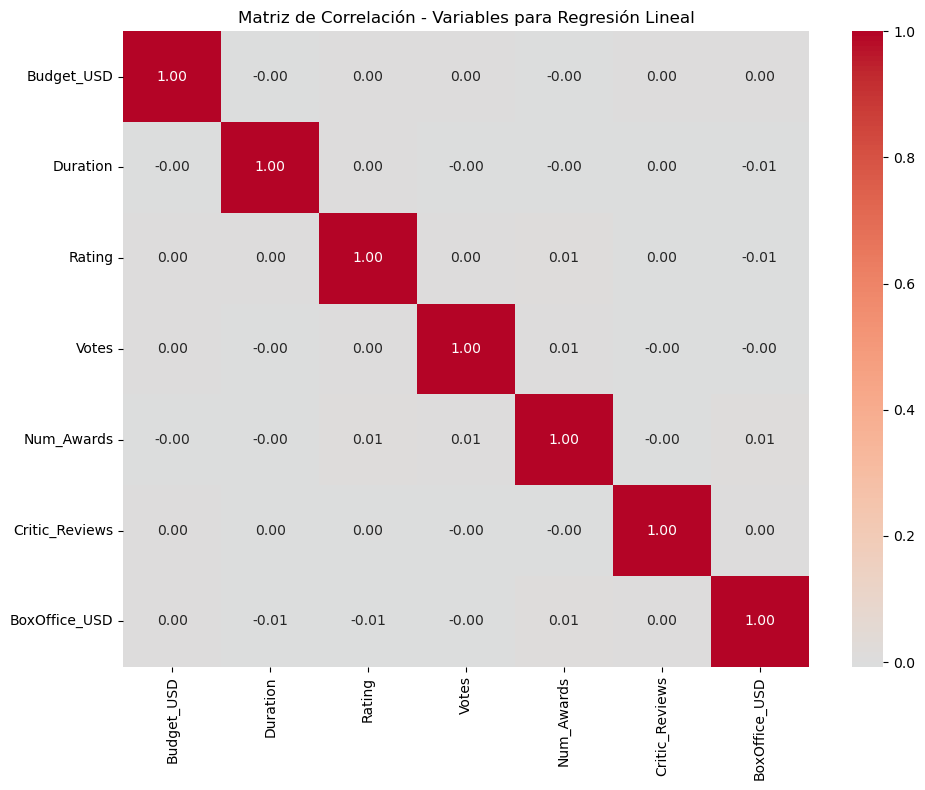

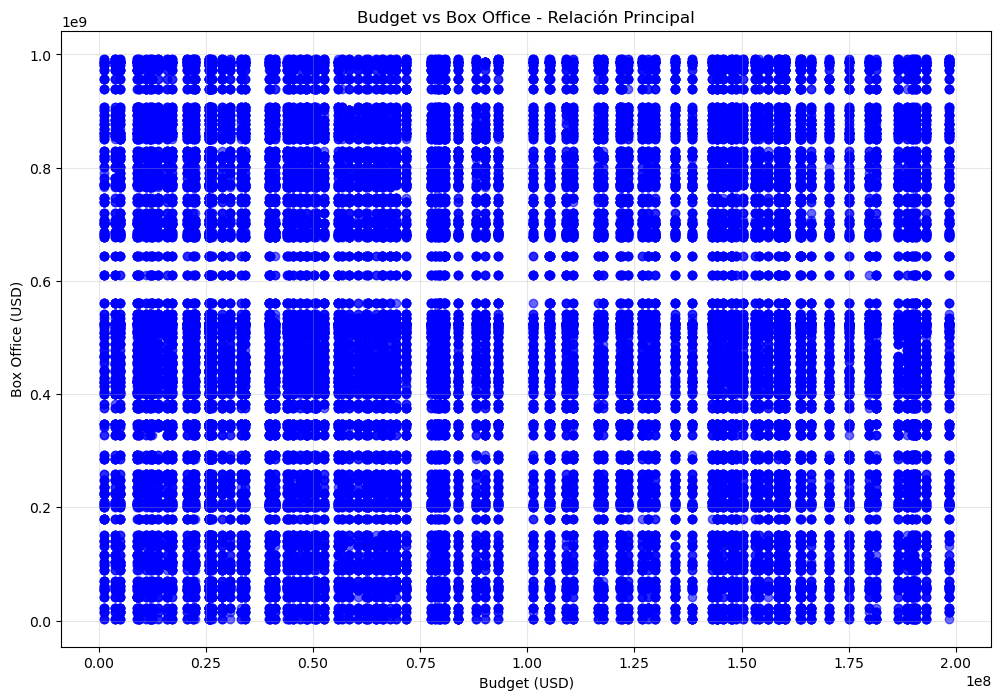

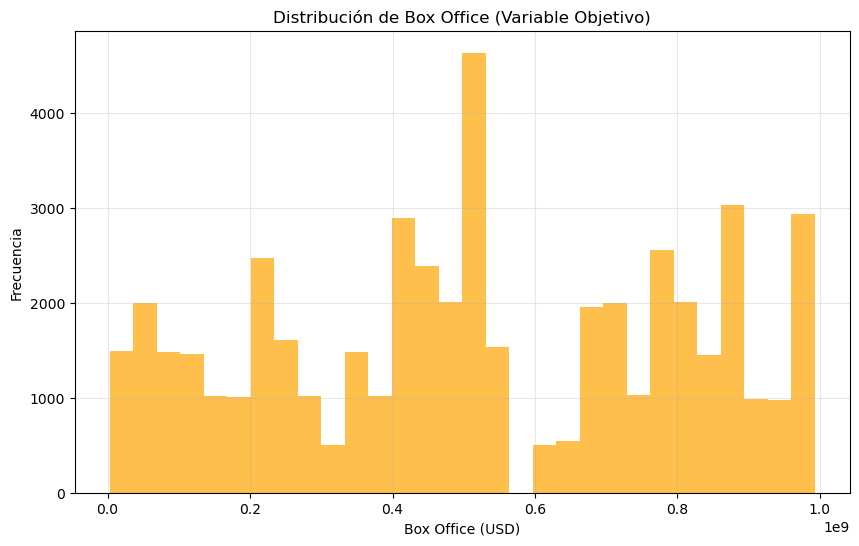

In [8]:
# Visualización del conjunto de datos

plt.style.use ('default') # siempre estilo por defecto para ahorrar tiemmpo 
sns.set_palette ("husl") #colores dados en la palate. 

# VISUALIZACIÓN DEL CONJUNTO DE DATOS - REGRESIÓN LINEAL
# Enfoque específico para predicción de BoxOffice_USD


# 2. INFORMACIÓN BÁSICA DEL DATASET
print("Información básica del dataset:")
print(f"Forma del dataset: {df.shape}") #Imprimo las 5 primeras filas. 
print("\nPrimeras 5 filas:")
print(df.head())

# 3. ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS
print("\nEstadísticas descriptivas:")
numeric_vars = ['Budget_USD', 'Duration', 'Rating', 'Votes', 'Num_Awards', 'Critic_Reviews', 'BoxOffice_USD']
print(df[numeric_vars].describe())

# 4. MATRIZ DE CORRELACIÓN - VARIABLES PARA REGRESIÓN
plt.figure(figsize=(10, 8))
# Seleccionar variables relevantes para regresión
regression_vars = ['Budget_USD', 'Duration', 'Rating', 'Votes', 'Num_Awards', 'Critic_Reviews', 'BoxOffice_USD']
correlation_matrix = df[regression_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación - Variables para Regresión Lineal')
plt.tight_layout()
plt.show()

# 5. SCATTER PLOT: BUDGET vs BOXOFFICE (variable más importante)
plt.figure(figsize=(12, 8))
plt.scatter(df['Budget_USD'], df['BoxOffice_USD'], alpha=0.6, color='blue')
plt.title('Budget vs Box Office - Relación Principal')
plt.xlabel('Budget (USD)')
plt.ylabel('Box Office (USD)')
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))
plt.grid(True, alpha=0.3)
plt.show()

# 6. DISTRIBUCIÓN DE LA VARIABLE OBJETIVO
plt.figure(figsize=(10, 6))
plt.hist(df['BoxOffice_USD'], bins=30, color='orange', alpha=0.7)
plt.title('Distribución de Box Office (Variable Objetivo)')
plt.xlabel('Box Office (USD)')
plt.ylabel('Frecuencia')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
# Modificación del conjutno de datos

# Preparación para modelo predictivo

# 1. VERIFICAR VALORES NULOS
print("Valores nulos por columna:")
print(df.isnull().sum())

# 2. SELECCIONAR VARIABLES PARA EL MODELO
# Variables predictoras (X) y variable objetivo (y)
features = ['Budget_USD', 'Duration', 'Rating', 'Votes', 'Num_Awards', 'Critic_Reviews']
target = 'BoxOffice_USD'

# Crear dataframe solo con variables del modelo
df_model = df[features + [target]].copy()
print(f"\nDataset para modelo: {df_model.shape}")

# 3. VERIFICAR OUTLIERS EXTREMOS (opcional)
# Ver estadísticas de BoxOffice_USD
print(f"\nBoxOffice - Q1: {df_model[target].quantile(0.25):,.0f}")
print(f"BoxOffice - Q3: {df_model[target].quantile(0.75):,.0f}")
print(f"BoxOffice - Max: {df_model[target].max():,.0f}")

# 4. CREAR NUEVAS VARIABLES (Feature Engineering)
# ROI (Return on Investment)
df_model['ROI'] = df_model['BoxOffice_USD'] / df_model['Budget_USD']

# Budget por minuto
df_model['Budget_per_Minute'] = df_model['Budget_USD'] / df_model['Duration']

# Rating ponderado por votos
df_model['Weighted_Rating'] = df_model['Rating'] * np.log(df_model['Votes'])

print("\nNuevas variables creadas:")
print("- ROI (BoxOffice/Budget)")
print("- Budget_per_Minute") 
print("- Weighted_Rating")

# 5. VERIFICAR EL DATASET FINAL
print(f"\nDataset final: {df_model.shape}")
print("\nPrimeras 3 filas del dataset modificado:")
print(df_model.head(3))

# 6. INFORMACIÓN FINAL
print(f"\nVariables predictoras: {len(features)}")
print(f"Variable objetivo: {target}")
print("Dataset listo para entrenamiento del modelo")

Valores nulos por columna:
Title                 0
Year                  0
Director              0
Duration              0
Rating                0
Votes                 0
Description           0
Language              0
Country               0
Budget_USD            0
BoxOffice_USD         0
Genre                 0
Production_Company    0
Content_Rating        0
Lead_Actor            0
Num_Awards            0
Critic_Reviews        0
dtype: int64

Dataset para modelo: (50000, 7)

BoxOffice - Q1: 259,032,858
BoxOffice - Q3: 770,412,921
BoxOffice - Max: 992,515,912

Nuevas variables creadas:
- ROI (BoxOffice/Budget)
- Budget_per_Minute
- Weighted_Rating

Dataset final: (50000, 10)

Primeras 3 filas del dataset modificado:
   Budget_USD  Duration  Rating   Votes  Num_Awards  Critic_Reviews  \
0    39979615       167     4.1  182425           8             229   
1   116404774       166     4.1  449351          20             466   
2   166261330       170     4.1  363328          16         

In [10]:
#Construcción del modelo de regresión lineal
# para el modelo toca si o si defenir variables 
# Variables predictoras (X)
X = df_model[['Budget_USD', 'Duration', 'Rating', 'Votes', 'Num_Awards', 'Critic_Reviews']]

# Variable objetivo (y)
y = df_model['BoxOffice_USD']

print(f"Variables predictoras: {X.shape}")
print(f"Variable objetivo: {y.shape}")

# 3. DIVIDIR DATOS EN ENTRENAMIENTO Y PRUEBA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nEntrenamiento: {X_train.shape[0]} películas")
print(f"Prueba: {X_test.shape[0]} películas")

# 4. CREAR Y ENTRENAR EL MODELO
modelo = LinearRegression()          # Crear modelo
modelo.fit(X_train, y_train)         # Entrenar modelo

print("\nModelo entrenado exitosamente")

# 5. HACER PREDICCIONES
y_pred = modelo.predict(X_test)      # Predicciones en conjunto de prueba

# 6. EVALUAR EL MODELO
mse = mean_squared_error(y_test, y_pred)     # Error cuadrático medio
r2 = r2_score(y_test, y_pred)               # R² Score

print(f"\n=== RESULTADOS DEL MODELO ===")
print(f"Error Cuadrático Medio: {mse:,.0f}")
print(f"R² Score: {r2:.4f}")
print(f"Precisión del modelo: {r2*100:.2f}%")

# 7. VER IMPORTANCIA DE VARIABLES
print(f"\n=== COEFICIENTES DEL MODELO ===")
feature_names = X.columns
coefficients = modelo.coef_

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercepto: {modelo.intercept_:.2f}")

Variables predictoras: (50000, 6)
Variable objetivo: (50000,)

Entrenamiento: 40000 películas
Prueba: 10000 películas

Modelo entrenado exitosamente

=== RESULTADOS DEL MODELO ===
Error Cuadrático Medio: 83,696,224,592,480,512
R² Score: -0.0005
Precisión del modelo: -0.05%

=== COEFICIENTES DEL MODELO ===
Budget_USD: 0.01
Duration: -87880.19
Rating: -1214600.32
Votes: 1.37
Num_Awards: 598146.30
Critic_Reviews: 3789.16
Intercepto: 528031847.59



=== PREDICCIONES ===
Ejemplo 1 - Bajo presupuesto: $512,867,687
Ejemplo 2 - Alto presupuesto: $519,110,739
Ejemplo 3 - Promedio: $516,919,403

=== COMPARACIÓN CON DATASET ===
BoxOffice promedio real: $517,606,250
BoxOffice mínimo real: $3,291,117
BoxOffice máximo real: $992,515,912

=== PREDICCION PERSONALIZADA ===
Mi película personalizada:
- Budget: $80,000,000
- Duración: 125 min
- Rating: 7.8
- BoxOffice predicho: $517,856,599


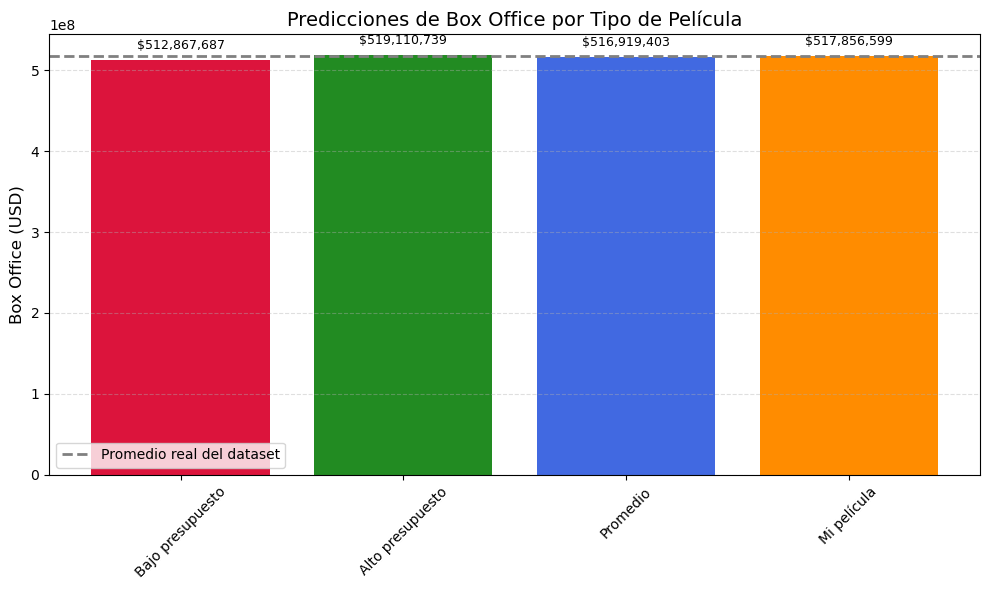

In [20]:
# Predicción de nuevos ejemplos


# 1. DEFINIR COLUMNAS USADAS EN EL MODELO
columnas = ['Budget_USD', 'Duration', 'Rating', 'Votes', 'Num_Awards', 'Critic_Reviews']

# 2. CREAR NUEVOS EJEMPLOS COMO DATAFRAMES
ejemplo1 = pd.DataFrame([[30000000, 120, 7.5, 150000, 5, 300]], columns=columnas)   # Bajo presupuesto
ejemplo2 = pd.DataFrame([[150000000, 140, 8.2, 400000, 15, 800]], columns=columnas) # Alto presupuesto
ejemplo3 = pd.DataFrame([[90000000, 130, 6.9, 250000, 10, 500]], columns=columnas)  # Promedio

# 3. HACER PREDICCIONES
pred1 = modelo.predict(ejemplo1)
pred2 = modelo.predict(ejemplo2) 
pred3 = modelo.predict(ejemplo3)

# 4. MOSTRAR RESULTADOS
print(f"\n=== PREDICCIONES ===")
print(f"Ejemplo 1 - Bajo presupuesto: ${pred1[0]:,.0f}")
print(f"Ejemplo 2 - Alto presupuesto: ${pred2[0]:,.0f}")
print(f"Ejemplo 3 - Promedio: ${pred3[0]:,.0f}")

# 5. COMPARAR CON VALORES REALES DEL DATASET
print(f"\n=== COMPARACIÓN CON DATASET ===")
print(f"BoxOffice promedio real: ${y.mean():,.0f}")
print(f"BoxOffice mínimo real: ${y.min():,.0f}")
print(f"BoxOffice máximo real: ${y.max():,.0f}")

# 6. PREDICCIÓN PERSONALIZADA
print(f"\n=== PREDICCION PERSONALIZADA ===")

mi_budget = 80000000
mi_duracion = 125
mi_rating = 7.8
mi_votos = 300000
mi_premios = 12
mis_criticas = 600

mi_ejemplo = pd.DataFrame([[mi_budget, mi_duracion, mi_rating, mi_votos, mi_premios, mis_criticas]], columns=columnas)
mi_prediccion = modelo.predict(mi_ejemplo)

print(f"Mi película personalizada:")
print(f"- Budget: ${mi_budget:,}")
print(f"- Duración: {mi_duracion} min")
print(f"- Rating: {mi_rating}")
print(f"- BoxOffice predicho: ${mi_prediccion[0]:,.0f}")

# 7. VISUALIZACIÓN MEJORADA DE PREDICCIONES

plt.figure(figsize=(10, 6))
ejemplos_nombres = ['Bajo presupuesto', 'Alto presupuesto', 'Promedio', 'Mi película']
predicciones = [pred1[0], pred2[0], pred3[0], mi_prediccion[0]]

# Colores personalizados
colores = ['crimson', 'forestgreen', 'royalblue', 'darkorange']

# Crear barras
barras = plt.bar(ejemplos_nombres, predicciones, color=colores)

# Agregar valores encima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 1e7, f"${yval:,.0f}", ha='center', va='bottom', fontsize=9)

# Línea de promedio real
promedio_real = y.mean()
plt.axhline(y=promedio_real, color='gray', linestyle='--', linewidth=2, label='Promedio real del dataset')

# Detalles del gráfico
plt.title('Predicciones de Box Office por Tipo de Película', fontsize=14)
plt.ylabel('Box Office (USD)', fontsize=12)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



# Analisis obtenidos  
A pesar de las diferencias en presupuesto, votos y calificación, el modelo predice valores similares de taquilla para las distintas películas. El modelo no esta captando las relaciones lineales o variables no son sunficientes. Me parece que entra mucho regresion polineal la verdad. 